## Imports

In [408]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

## Datasets paths

In [409]:
train_dir = '../dataset/train1/'
test_dir = '../dataset/test2/'
print(os.listdir("../dataset"))

['sampleSubmission.csv', 'test1', 'test2', 'train', 'train1']


## Image properties

In [410]:
FAST_RUN = False
# Largura imagem
Image_Width = 128
# Altura imagem
Image_Height = 128
# Tamanho da imagem
Image_Size = (Image_Width, Image_Height)
# Canais de imagem
Image_Channels = 3

## Prepare dataset for training model:

In [411]:
filenames = os.listdir(train_dir)
categories = []

for file in filenames:        
    category = file.split('.')[0]    
    if category == 'dog':
        categories.append(1)
    else:     
        categories.append(0)

df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
    })

In [412]:
train_data = pd.DataFrame(
             train_data,
             columns = ['image', 'label'],
             index = None)

X = df.drop('category', axis = 1)
y = df['category']

In [413]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


In [414]:
df.tail()

,filename,category
295,dog.919.jpg,1
296,dog.920.jpg,1
297,dog.921.jpg,1
298,dog.922.jpg,1
299,dog.923.jpg,1


## Total de arquivos

<AxesSubplot:>

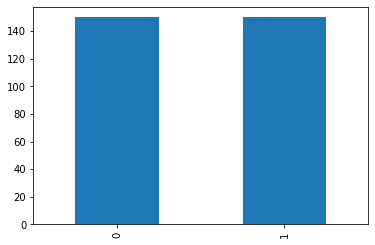

In [415]:
df['category'].value_counts().plot.bar()

## Inicializando a rede neural convolucional

### Imports

In [416]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization, Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Model

In [417]:
train_df, validate_df = train_test_split(train_data, test_size = 0.30,
                                         random_state = 42)

In [418]:
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

In [419]:
model = Sequential()

In [420]:
model.add(Conv2D(32, (3, 3), padding = 'valid', input_shape = (128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.25))

In [421]:
model.add(Conv2D(64,(3,3),padding='valid', 
          input_shape=(Image_Width, Image_Height, Image_Channels)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.6))

In [422]:
model.add(Conv2D(128,(3,3),padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2, name = "dense_2"))
model.add(Activation('softmax'))

In [423]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',              
              metrics = ['accuracy']
              )

In [424]:
y = y.replace({ 0 : 'cat', 1 : 'dog' })

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [426]:
df["category"] = df["category"].replace({ 0 : 'cat', 1 : 'dog' })

In [427]:
train_df, validate_df = train_test_split(df, test_size = 0.20,
                                         random_state = 42)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

In [428]:
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({
    'filename' : test_filenames
    })
nb_samples = test_df.shape[0]

In [429]:
test_datagen = ImageDataGenerator(rotation_range = 15,
                                  rescale = 1./255,                                  
                                  shear_range = 0.1,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1
                                  )
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  test_dir,
                                                  x_col = 'filename',
                                                  y_col = None,
                                                  target_size = Image_Size,
                                                  class_mode = None,                                                  
                                                  shuffle = False
                                                  )

Found 100 validated image filenames.


In [430]:
validation_datagen  = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    train_dir,
    x_col = 'filename',
    y_col = 'category',
    target_size = Image_Size,
    class_mode = 'categorical'    
    )

Found 60 validated image filenames belonging to 2 classes.


In [431]:
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    train_dir,
                                                    x_col = 'filename',
                                                    y_col = 'category',
                                                    target_size = Image_Size,
                                                    class_mode = 'categorical'                                                    
                                                    )

Found 240 validated image filenames belonging to 2 classes.


In [434]:
model_feat = Model(inputs=model.input,outputs=model.get_layer(index = 1).output)

model_feat.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',              
              metrics = ['accuracy']
              )

In [437]:
feat_train = model_feat.fit(X_train)

ValueError: in user code:

    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer conv2d_52 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 1]


In [396]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [397]:
dete = DecisionTreeClassifier(criterion = "entropy",
                              random_state = 100,
                              max_depth = 3,
                              min_samples_leaf = 5)

In [406]:
dete.fit(X_train, y_train)

ValueError: could not convert string to float: 'dog.852.jpg'

In [399]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_2').output)

In [400]:
dete.fit(feat_train, np.argmax(feat_train, axis = 1))

ValueError: Found array with dim 4. Estimator expected <= 2.

In [ ]:
y_pred = model_feat.predict(test_generator)

In [310]:
metrics.classification_report(validation_generator, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [2, 100]

## Manage data

In [95]:
df["category"] = df["category"].replace({ 0 : 'cat', 1 : 'dog' })

In [96]:
train_df, validate_df = train_test_split(df, test_size = 0.30,
                                         random_state = 42)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

<AxesSubplot:>

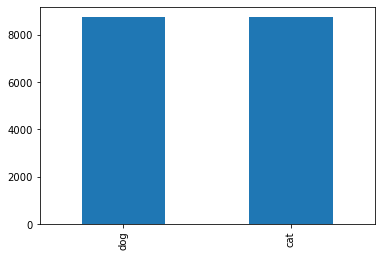

In [97]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

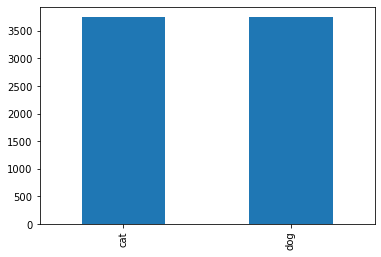

In [98]:
validate_df['category'].value_counts().plot.bar()

In [99]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

## Treinamento

In [100]:
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    train_dir,
                                                    x_col = 'filename',
                                                    y_col = 'category',
                                                    target_size = Image_Size,
                                                    class_mode = 'categorical',
                                                    batch_size = batch_size
                                                    )

Found 17500 validated image filenames belonging to 2 classes.


In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [118]:
dete = DecisionTreeClassifier(criterion = "entropy",
                              random_state = 100,
                              max_depth = 3,
                              min_samples_leaf = 5)

In [164]:
feat_train = model.predict(X_train)

ValueError: in user code:

    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\gabri\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 2]


In [158]:
dete.fit(feat_train, train_df['filename'])

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [154]:
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({
    'filename' : test_filenames
    })
nb_samples = test_df.shape[0]

In [ ]:
dete.fit(train_generator, np.argmax())

## Validation data generator

In [101]:
validation_datagen  = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    train_dir,
    x_col = 'filename',
    y_col = 'category',
    target_size = Image_Size,
    class_mode = 'categorical',
    batch_size = batch_size
    )

Found 7500 validated image filenames belonging to 2 classes.


## See how our generator work

In [102]:
example_df = train_df.sample(n = 1).reset_index(drop = True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    train_dir,
    x_col = 'filename',
    y_col = 'category',
    target_size = Image_Size,
    class_mode = 'categorical')

Found 1 validated image filenames belonging to 1 classes.


<function matplotlib.pyplot.show(close=None, block=None)>

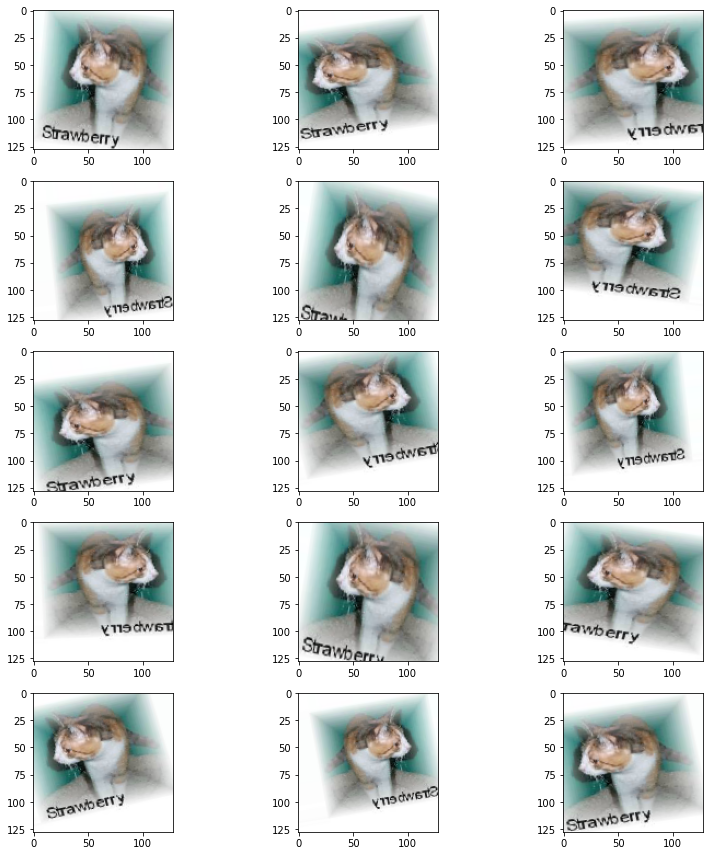

In [103]:
plt.figure(figsize = (12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()        
plt.show

## Treinando modelo

In [25]:
epochs = 3 if FAST_RUN else 50
history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_validate//batch_size,
    callbacks = callbacks    
    )        

Epoch 1/50
500/500 [==============================] - 587s 1s/step - loss: 0.9298 - accuracy: 0.5753 - val_loss: 0.8578 - val_accuracy: 0.5584
Epoch 2/50
500/500 [==============================] - 551s 1s/step - loss: 0.6604 - accuracy: 0.6351 - val_loss: 0.7128 - val_accuracy: 0.6292
Epoch 3/50
500/500 [==============================] - 542s 1s/step - loss: 0.5950 - accuracy: 0.6927 - val_loss: 0.5824 - val_accuracy: 0.7120
Epoch 4/50
500/500 [==============================] - 535s 1s/step - loss: 0.5781 - accuracy: 0.7067 - val_loss: 0.5472 - val_accuracy: 0.7163
Epoch 5/50
500/500 [==============================] - 532s 1s/step - loss: 0.5511 - accuracy: 0.7247 - val_loss: 0.6196 - val_accuracy: 0.6741
Epoch 6/50
500/500 [==============================] - 532s 1s/step - loss: 0.5328 - accuracy: 0.7349 - val_loss: 0.4819 - val_accuracy: 0.7673
Epoch 7/50
500/500 [==============================] - 540s 1s/step - loss: 0.5287 - accuracy: 0.7469 - val_loss: 0.4610 - val_accuracy: 0.7831

500/500 [==============================] - 546s 1s/step - loss: 0.2907 - accuracy: 0.8760 - val_loss: 0.2222 - val_accuracy: 0.9071


## Save the model

In [26]:
model.save("model_cats_dogs1.h5")

## Virtualize Training

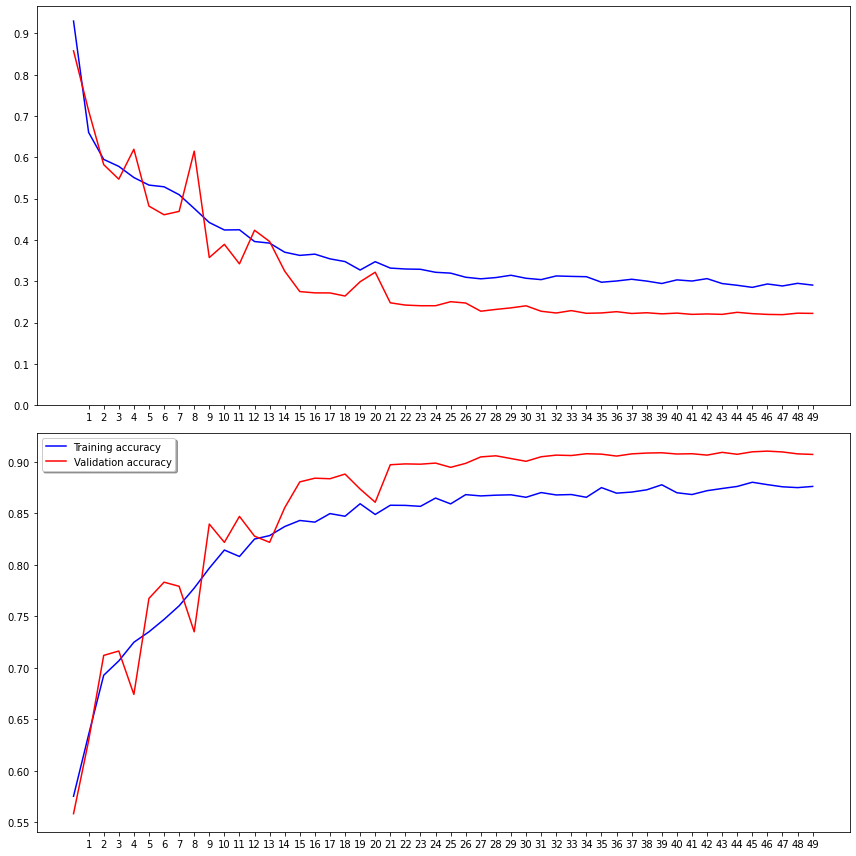

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 12))
ax1.plot(history.history['loss'], 
         color = 'b', 
         label = "Training loss")
ax1.plot(history.history['val_loss'], 
         color = 'r',
         label = "validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'],
         color = 'b',
         label = "Training accuracy")
ax2.plot(history.history['val_accuracy'],
         color = 'r',
         label = "Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc = 'best', shadow = True)
plt.tight_layout()
plt.show()

## Test data preparation

In [104]:
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({
    'filename' : test_filenames
    })
nb_samples = test_df.shape[0]

## Create testing generator

In [105]:
test_datagen = ImageDataGenerator(rotation_range = 15,
                                  rescale = 1./255,                                  
                                  shear_range = 0.1,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1
                                  )
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  test_dir,
                                                  x_col = 'filename',
                                                  y_col = None,
                                                  target_size = Image_Size,
                                                  class_mode = None,
                                                  batch_size = batch_size,
                                                  shuffle = False
                                                  )

Found 12500 validated image filenames.


## Make categorical prediction

In [113]:
predict = model.predict(test_generator,
                        steps = np.ceil(nb_samples/batch_size))

## Convert labels to categories

In [35]:
test_df['category'] = np.argmax(predict, axis = -1)

label_map = dict((v, k) for k, v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({'dog' : 1, 'cat' : 0})

## Virtualize result

<AxesSubplot:>

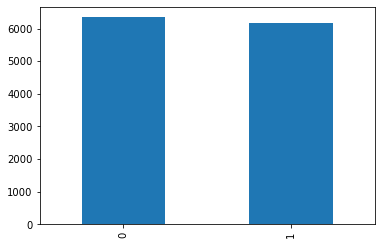

In [36]:
test_df['category'].value_counts().plot.bar()

### Visualize the prediction results

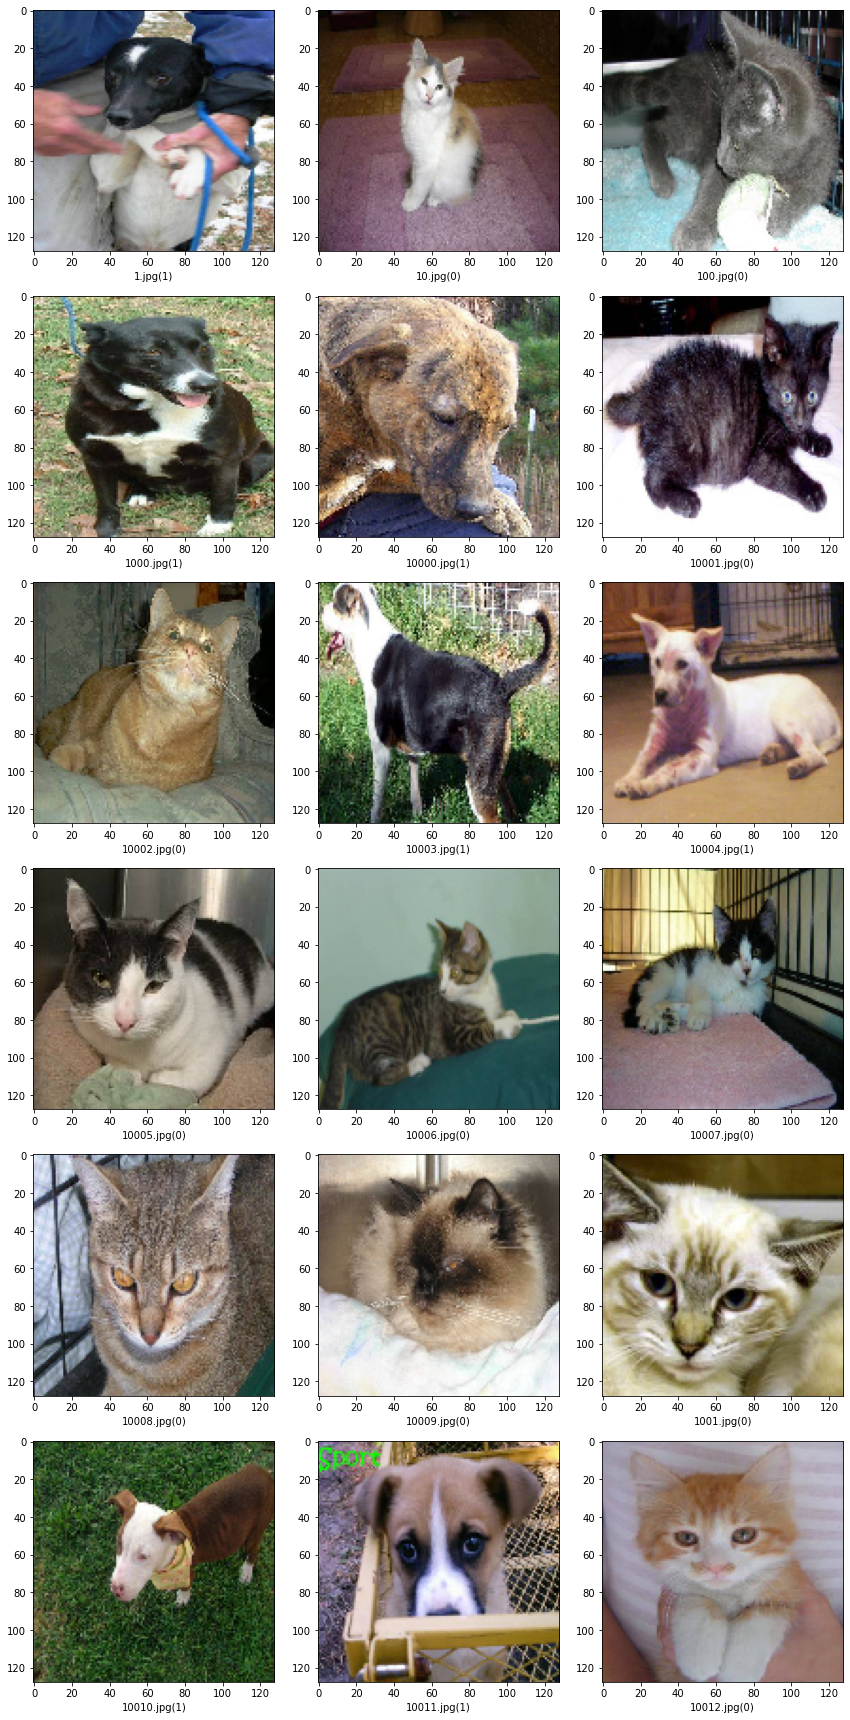

In [41]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize = (12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(test_dir + filename,
                   target_size = Image_Size)
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')

plt.tight_layout()    
plt.show()